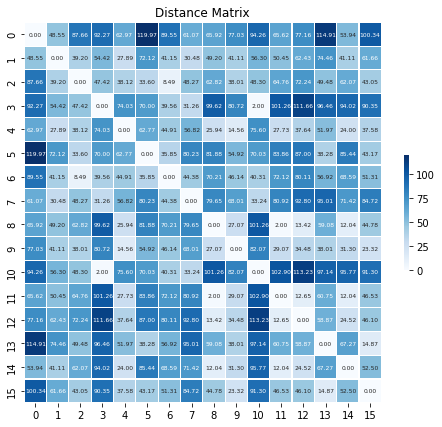

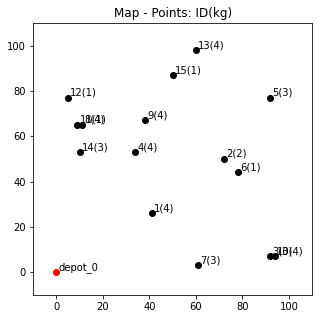

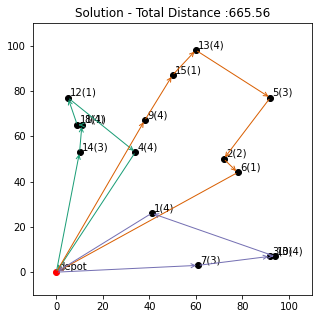

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import math
 
# Basic Data
n_customer = 15
n_point = n_customer + 1 # Including Depot
max_vehicle = 5
vehicle_capacity = 15
 
# Load Problem
df = pd.read_csv('problem.csv')
distances = pd.DataFrame(distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values).round(2), index=df.index, columns=df.index).values
demands = df['demand'].values
 
# Plot Distance Matrix
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.2f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1, annot_kws={"fontsize":6})
plt.title('Distance Matrix')
plt.show()
 
# Plot Customer Locations
plt.figure(figsize=(5, 5))
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot_0')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        demand = row['demand']
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}({demand})')
 
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title('Map - Points: ID(kg)')
#plt.show()
 
#Load Solution and Calculate Performance
sol = pd.read_excel('solution.xlsx')
 
plt.figure(figsize=(5, 5))
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        demand = row['demand']
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}({demand})')
plt.xlim([-10, 110])
plt.ylim([-10, 110])
cmap = matplotlib.cm.get_cmap('Dark2')
 
vhc_distance = []
vhc_weights = []
is_feasible = True
for index, row in sol.iterrows():
    total_distance = 0
    total_weight = 0
    from_node = 0
    for idx, x in enumerate(row.values):
        if idx != 0 and not math.isnan(x):
            to_node = int(x)
            total_weight += int(demands[to_node])
            total_distance = total_distance + distances[from_node][to_node]
            arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor=cmap(index))
            plt.annotate('', xy=[df.iloc[to_node]['x'], df.iloc[to_node]['y']],
                         xytext=[df.iloc[from_node]['x'], df.iloc[from_node]['y']],
                             arrowprops=arrowprops)
            from_node = to_node
    if total_weight > vehicle_capacity or index + 1 > max_vehicle:
        is_feasible = False
    total_distance = total_distance + distances[from_node][0]
    plt.annotate('', xy=[df.iloc[0]['x'], df.iloc[0]['y']],
                 xytext=[df.iloc[from_node]['x'], df.iloc[from_node]['y']],
                 arrowprops=arrowprops)
    vhc_distance.append(round(total_distance, 2))
    vhc_weights.append(total_weight)
 
if sum(vhc_weights)!=sum(demands):
    is_feasible = False
 
if is_feasible:
    plt.title('Solution - Total Distance :' + str(round(sum(vhc_distance), 2)))
else:
    plt.title('Solution is INFEASIBLE, Please Try Again')
plt.show()